# EDA with Python and Implementing Logistic Regression

- We will be working with the titanic data set from kaggle this is very famous data set and often is students firststep in Machine learning

- We will be trying to predict a classification - survival or decesased

- we'll use a "semi cleaned" version of the dataset, this is not the original file

In [1]:
# Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('titanic_train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
df.shape

(891, 12)

# THE DATA

- lets start by reading the data frame

In [6]:
df1 = df.copy()

In [7]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df2 = df1.drop('PassengerId',axis=1)

In [9]:
df2.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# EXPLORATORY DATA ANALYSIS

- Lets start the Exploratory data analysis by finding out some missing values

- We can use simple sea born to check where the missing values are there and where it is not there. by using heat map

In [12]:
df2.isnull()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

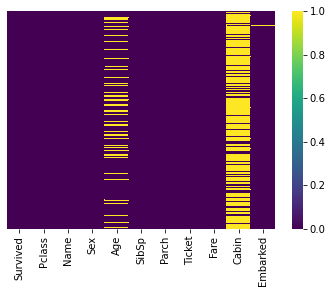

In [13]:
sns.heatmap(df2.isnull(),yticklabels=False,cmap='viridis')

- We can see that roughly 20 percent of the Age data is missing the propotion of the age is likely small enough of reasonable replament with some form of imputation, looking at cabin column, it looks like we are missing too much of data values to do something at a basic level, we can probably drop this feature or change it to cabin known or not know as 0 or 1

In [14]:
df2.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [15]:
df2.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:xlabel='Survived', ylabel='count'>

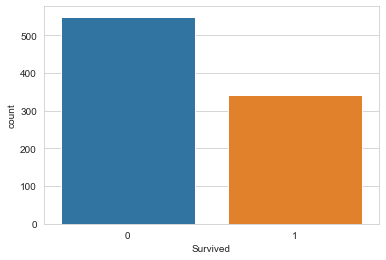

In [16]:
sns.set_style(style='whitegrid')
sns.countplot(x='Survived',data=df2)

<AxesSubplot:xlabel='Survived', ylabel='count'>

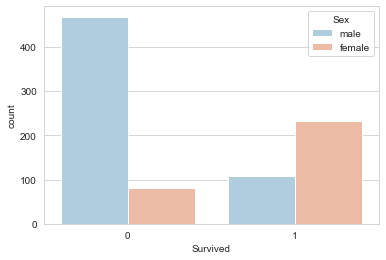

In [17]:
sns.set_style(style='whitegrid')
sns.countplot(x='Survived',hue='Sex',data=df2,palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

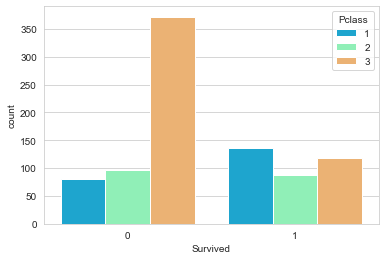

In [18]:
sns.set_style(style='whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=df2,palette='rainbow')

C:\Users\ashish\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

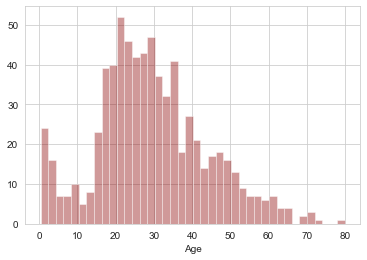

In [19]:
sns.distplot(df2['Age'].dropna(),kde=False,color='darkred',bins=40)

<AxesSubplot:>

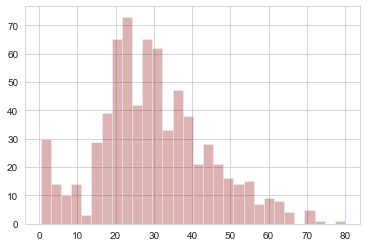

In [20]:
df2['Age'].hist(color='darkred',bins = 30, alpha=0.3) #Here alpha is  used to change the color

In [21]:
df2.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:xlabel='SibSp', ylabel='count'>

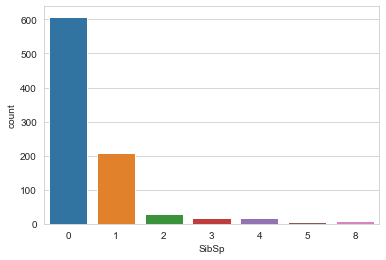

In [22]:
sns.countplot(x='SibSp',data=df2)

<AxesSubplot:xlabel='Fare', ylabel='Count'>

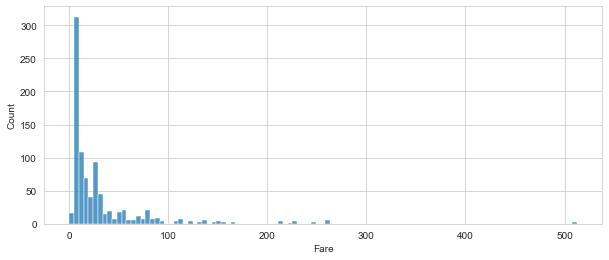

In [23]:
plt.figure(figsize=(10,4))
sns.histplot(x='Fare',data=df2)

# DATA CLEANING

- we want to fill the missing age data instead of just dropping the missing age from data rows, 1 way to do this is by filling in the mean age of all the passengers (imputation). However we can be smart about this and check the average age by passenger class

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

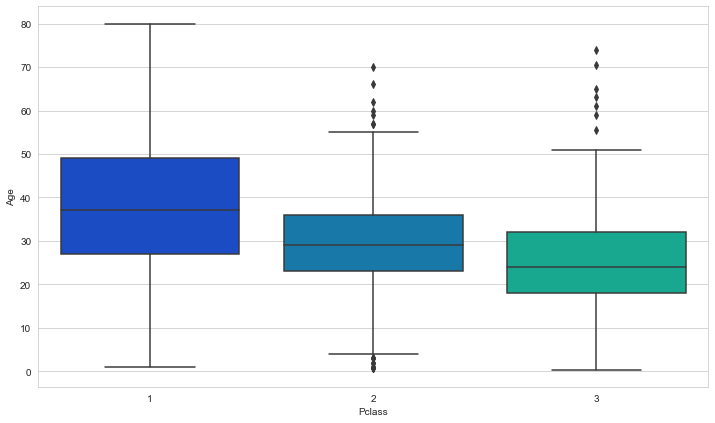

In [24]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass', y='Age',data=df2,palette='winter')

<AxesSubplot:>

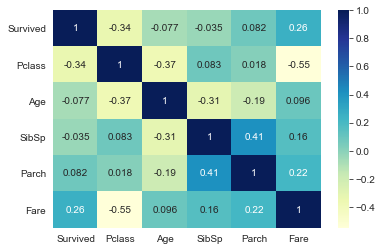

In [25]:
df2_corr = df2.corr()
sns.heatmap(df2_corr,annot=True,cmap="YlGnBu")

- Here we can tell that there is some kind of co relation between these two classes so we will replace the values by finding out the average of each class and then replacing the values accordingly, impute based on p class

In [26]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        
        elif Pclass ==2:
            return 29
        
        else:
            return 24
        
    else:
        return Age

In [27]:
# Applying the function

In [28]:
df2['Age'] = df2[['Age','Pclass']].apply(impute_age,axis=1)

In [29]:
# this is going to apply to the real data set

<AxesSubplot:>

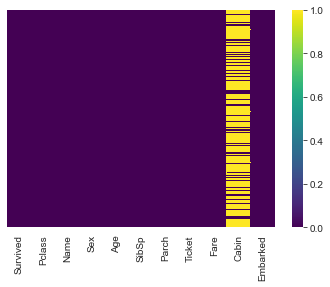

In [30]:
sns.heatmap(df2.isnull(),yticklabels=False,cmap='viridis')

In [31]:
# Lets go ahead and drop the cabin column and the row in embarked that is NaN

In [32]:
df2.drop('Cabin',inplace=True,axis=1)

<AxesSubplot:>

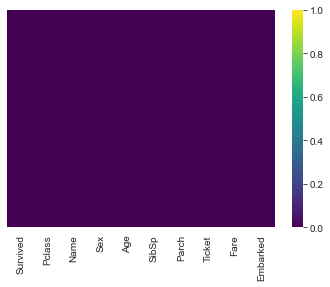

In [33]:
sns.heatmap(df2.isnull(),yticklabels=False,cmap='viridis')

In [34]:
# we can see that we have handled the nan values

In [35]:
df2.dropna(inplace=True)

In [36]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Name      889 non-null    object 
 3   Sex       889 non-null    object 
 4   Age       889 non-null    float64
 5   SibSp     889 non-null    int64  
 6   Parch     889 non-null    int64  
 7   Ticket    889 non-null    object 
 8   Fare      889 non-null    float64
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 76.4+ KB


In [37]:
pd.get_dummies(df2['Embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [38]:
sex = pd.get_dummies(df2['Sex'],drop_first=True)
embark = pd.get_dummies(df2['Embarked'],drop_first=True)
# This is basically used to convert the categorical into a interger

In [39]:
df2.drop(['Embarked','Sex','Name','Ticket'],axis=1,inplace=True)

In [40]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Age       889 non-null    float64
 3   SibSp     889 non-null    int64  
 4   Parch     889 non-null    int64  
 5   Fare      889 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 48.6 KB


In [41]:
df2 = pd.concat([df2,sex,embark],axis=1)

In [42]:
df2.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


# BUILDING A LOGISTIC REGRESSION

In [43]:
x = df2.drop('Survived',axis=1)

In [44]:
y = df2['Survived']

In [45]:
x.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [46]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression

In [48]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.3,random_state = 101)

In [49]:
lo = LogisticRegression()

In [50]:
lo.fit(x_train,y_train)

C:\Users\ashish\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [52]:
predictions = lo.predict(x_test)

In [56]:
con_mat_df2 = confusion_matrix(y_test,predictions)

In [57]:
con_mat_df2

array([[147,  16],
       [ 30,  74]], dtype=int64)

In [58]:
acc = accuracy_score(y_test,predictions)

In [59]:
acc

0.8277153558052435

In [61]:
print('The Accuracy of this Logistic model is', acc)

The Accuracy of this Logistic model is 0.8277153558052435
